In [46]:
import tensorflow as tf

import scipy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [199]:
PATH = './Images'
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'train')
test_dir = os.path.join(PATH, '')

In [200]:
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

In [201]:
batch_size = 64
epochs = 30
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [203]:
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)
test_image_generator = ImageDataGenerator(rescale = 1./255)

train_data_gen = train_image_generator.flow_from_directory(
  directory = train_dir,
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
)
val_data_gen = validation_image_generator.flow_from_directory(
  directory = validation_dir,
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
)
test_data_gen = test_image_generator.flow_from_directory(
  directory = test_dir,
  classes = ['test'],
  target_size = (IMG_HEIGHT, IMG_WIDTH),
  batch_size = batch_size,
  shuffle = False
)

Found 79 images belonging to 7 classes.
Found 79 images belonging to 7 classes.
Found 7 images belonging to 1 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


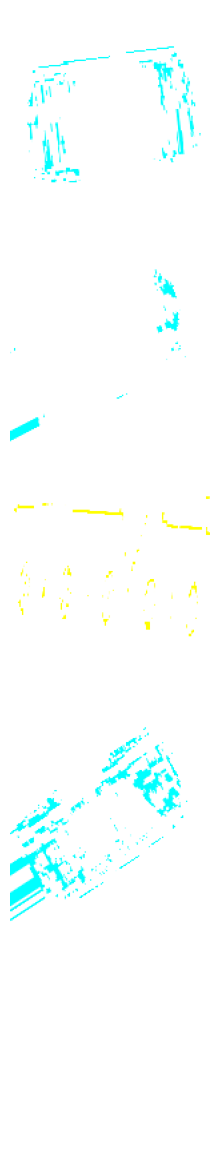

In [228]:
def plotImages(images_arr, probabilities = False, labels = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax, label in zip( images_arr, probabilities, axes, labels):
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(f"{label} - {(probability*100)}")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


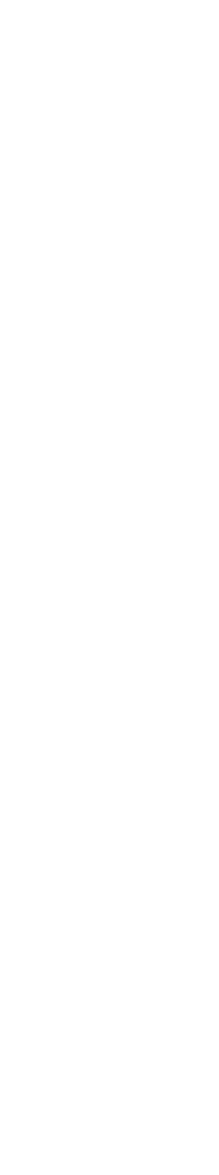

In [213]:
train_image_generator = ImageDataGenerator(
    #rescale = 1./255,
    rotation_range = 45,
    horizontal_flip = True,
    vertical_flip = True,
    zoom_range = [0.9, 1.1],
    shear_range = 0.2
)

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [214]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH))
    

Found 79 images belonging to 7 classes.


In [215]:
model = Sequential()
model.add(Conv2D(128, (3,3), padding='same', activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(7))

model.build(input_shape = [IMG_HEIGHT, IMG_WIDTH])
model.summary()


Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_81 (Conv2D)          (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d_81 (MaxPoolin  (None, 75, 75, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_82 (Conv2D)          (None, 73, 73, 32)        36896     
                                                                 
 max_pooling2d_82 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 flatten_34 (Flatten)        (None, 41472)             0         
                                                                 
 dense_68 (Dense)            (None, 32)              

In [216]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False,
                                                    label_smoothing=0.0,
                                                    axis=-1),
    metrics = ['accuracy']
    )

In [209]:
history = model.fit(
    x = train_data_gen,
    epochs = epochs,
    batch_size = batch_size,
    steps_per_epoch = 1,
    validation_data = val_data_gen,
    validation_steps = 1
    )

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 8.5849 - accuracy: 0.3125 - val_loss: 7.3811 - val_accuracy: 0.0625
Epoch 2/30
1/1 [==============================] - 2s 2s/step - loss: 6.8858 - accuracy: 0.0938 - val_loss: 6.4641 - val_accuracy: 0.0938
Epoch 3/30
1/1 [==============================] - 1s 636ms/step - loss: 8.6935 - accuracy: 0.0667 - val_loss: 6.7998 - val_accuracy: 0.3438
Epoch 4/30
1/1 [==============================] - 2s 2s/step - loss: 6.0443 - accuracy: 0.3281 - val_loss: 9.5701 - val_accuracy: 0.1250
Epoch 5/30
1/1 [==============================] - 1s 620ms/step - loss: 8.5963 - accuracy: 0.2000 - val_loss: 9.8220 - val_accuracy: 0.0938
Epoch 6/30
1/1 [==============================] - 1s 627ms/step - loss: 9.6709 - accuracy: 0.1333 - val_loss: 9.8220 - val_accuracy: 0.0469
Epoch 7/30
1/1 [==============================] - 1s 653ms/step - loss: 8.5963 - accuracy: 0.1333 - val_loss: 8.8146 - val_accuracy: 0.0781
Epoch 8/30
1/1 [=============

1/1 [==============================] - 0s 99ms/step


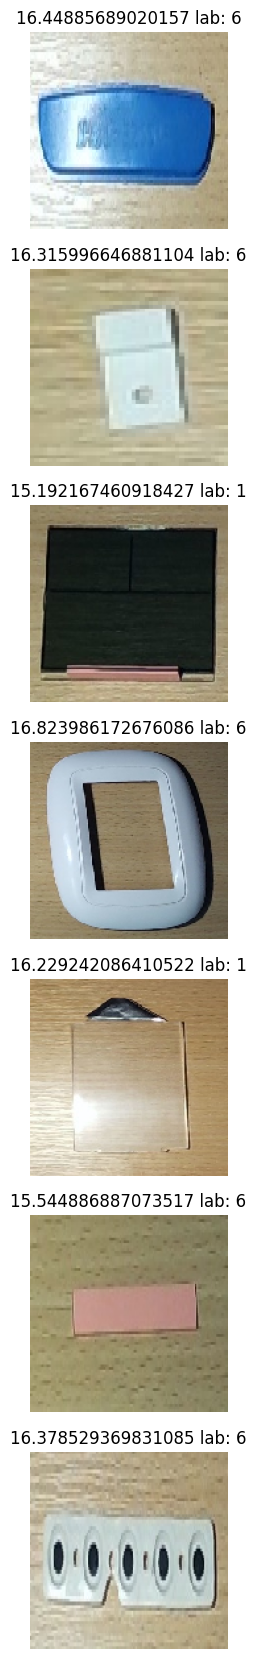

In [229]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_data_gen)

test_images, _ = next(test_data_gen)


predictionPercent = []
predictionLabel = []

for i in range(len(predictions)):
    value = 0
    category = 0
    for j in range(len(predictions[i])):
        if predictions[i][j] > value:
            value = predictions[i][j]
            category = j
    predictionPercent.append(value)
    predictionLabel.append(category)

plotImages(test_images[:7], predictionPercent, predictionLabel)